# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.573390e+01     1.270673e+01
 * time: 0.001837015151977539
     1     2.901446e+01     4.798925e+00
 * time: 0.007480144500732422
     2     2.450068e+01     3.153774e+00
 * time: 0.013027191162109375
     3     2.104124e+01     2.086765e+00
 * time: 0.01845717430114746
     4     1.971808e+01     1.601496e+00
 * time: 0.02364516258239746
     5     1.961157e+01     2.231076e+00
 * time: 0.028060197830200195
     6     1.923222e+01     1.582225e+00
 * time: 0.03232002258300781
     7     1.887210e+01     1.194757e+00
 * time: 0.036570072174072266
     8     1.854645e+01     9.641637e-01
 * time: 0.040798187255859375
     9     1.832456e+01     8.119555e-01
 * time: 0.045101165771484375
    10     1.817173e+01     6.088977e-01
 * time: 0.04932117462158203
    11     1.806599e+01     5.899637e-01
 * time: 0.05356311798095703
    12     1.797911e+01     6.802276e-01
 * time: 0.05781817436218262
    13     1.790603e+01     6.100871e-01
 

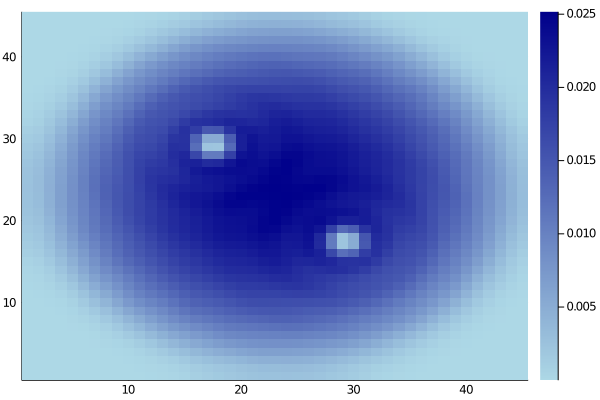

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)